<a href="https://colab.research.google.com/github/AriannaGrossi/MLPNS_AGrossi/blob/main/MBoltzmannDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function, division #garantisce la compatibilità di alcune funzioni tra python2 e python 3(future)
#in Python2 la funzione print non richiedeva le parentesi (print "Hello world")
#In Python2 la divisione?
import numpy as np
import scipy as sp #pacchetto per creare distribuzioni
from scipy import stats #sottopacchetto del pacchetto scipy sempre per fare statistica
import pylab as pl #pacchetto per creare plots
%pylab inline 
#non serve su colab, ma serve se trasferissimo il codice su una piattaforma diversa
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/fbb.mplstyle")



Populating the interactive namespace from numpy and matplotlib


#La distribuzione di Maxwell-Boltzmann
(Modello statistico ideato da Ludwig Boltzmann e James Clerk Maxwell nel 1800)

Conoscendo le proprietà microscopiche di un sistema fisico (intese in senso statistico), possiamo sfruttare la statistica per descrivere il comportamento macroscopico di tale sistema.

Considerando un sistema costituito da un gas, ovviamente non possiamo conoscere e descrivere il moto microscopico di ogni particella di tale sistema, ma conosciamo la distribuzione delle probabilità delle velocità delle particelle del sistema, nota come **distribuzione di Maxwell-Boltzmann**.  

**$P(v) = 4 \pi \left( \frac{m}{2 \pi T}\right)^{3/2} v^2 e^{- m v^2 /2 T}$** 

Ricordiamo che la velocità delle particelle di un gas (ossia una proprietà microscopica del sistema) dipende dalla temperatura alla quale si trova il gas (ossia una proprietà macroscopica del sistema): ciò significa che la velocità delle particelle di un gas varierà al variare della temperatura alla quale si trova il gas. 

Notiamo che la distribuzione di Maxwell-Boltzmann è un caso particolare di un'altra distribuzione di probabilità, ossia la distribuzione Chi
 ([*Chi distribution*](https://en.wikipedia.org/wiki/Chi_distribution)), la quale è caratterizzata dal solo parametro $k$, il quale indica il numero di gradi di libertà del sistema considerato.

**$f(x;k) = \begin{cases}
\dfrac{x^{k-1}e^{-x^2/2}}{2^{k/2-1}\Gamma\left(\frac{k}{2}\right)}, & x\geq 0 \\ 0 & \text{altrove}
\end{cases}$**
 
 with 3 degrees of freedom, and with a scale parameter corresponding to the temperature in some way. 


Below I have created 3 distributions. 


# 1)Inserire le etichette (labels) agli assi del plot

In [2]:
sp.stats.chi?
#rvs method: random_state=None per la riproducibilità del codice

Text(0, 0.5, 'Numero delle particelle nella simulazione')

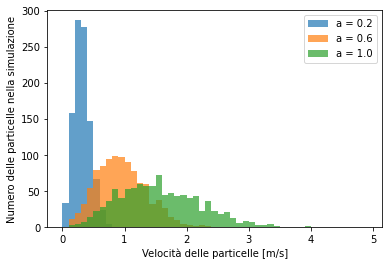

In [3]:
np.random.randn(123)
fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1), alpha=0.7,
       label="a = %.1f"%a);

pl.legend();
pl.xlabel("Velocità delle particelle [m/s]")
pl.ylabel("Numero delle particelle nella simulazione")
#lo scale parameter è legato alla temperatura

In [4]:
sp.stats.chi.rvs(df=3, scale=1.0, size=1000).mean()

1.6330878557055912

#2) Sapendo che il parametro di scala $a$ è una funzione della temperatura T del gas,  which is correct:
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**? 

   (in other words, is the dependency on the root of the temperature or on the inverse root of the temperature ?)
 

Risposta: **$\sqrt{T}$**


# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed? 
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$


**calculate the mean of all three distributions. Compare it with the mean of the empirical distributions I generated in step 1. How does this mean compare to the most probable molecular speed.**

In [5]:
def meanCHI2(a, k=3):
  """
  funzione per calcolare medie della distribuzione
  Maxwell-Boltzmann dati i parametro a e k
  Input:
  a: (float of int) parametro di scala della distribuzione MB
  k: (int) gradi di libertà per la distribuzione del chi quadro
  Return:
  media della distribuzione
  """
  return a*(np.sqrt(2)*sp.special.gamma((k + 1)* 0.5)/sp.special.gamma(k/2))
  #sp.special.gamma() funzione, contenuta nel pacchetto scipy, che calcola la 
  #funzione gamma 
def meanMB(a):
  """
  funzione per calcolare medie della distribuzione
  Maxwell-Boltzmann dato il parametro a
  Input:
  a: (float of int) parametro di scala della distribuzione MB 
  Return:
  media della distribuzione
  """
  return 2* a * np.sqrt(2 / np.pi)
for a in [0.2, 0.6, 1.0]:
  print("from theoretical formula: {0:.2f}".format(meanMB(a)))
  print("from theoretical formula for CHI: {0:.2f}".format(meanCHI2(a, k=3)))
  print("from distribution formula: {0:.2f}".format(sp.stats.chi.rvs(df=3, scale=a, size=1000, random_state=323).mean()))

from theoretical formula: 0.32
from theoretical formula for CHI: 0.32
from distribution formula: 0.32
from theoretical formula: 0.96
from theoretical formula for CHI: 0.96
from distribution formula: 0.96
from theoretical formula: 1.60
from theoretical formula for CHI: 1.60
from distribution formula: 1.60


This really only holds for perfect gasses, which means under 4 assumptions: 
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

#4)Facoltativo:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)
